In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Bootstrap en régression linéaire:

Dans ce note book, nous allons illustrer l'utilisation du Bootstrap en régression linéaire par trois différentes méthodes.


## Partie 1:

# Nouvelle section

## Partie 2


Dans cette partie nous allons implemter le bootstrap des résidus. Pour cela on utilise un jeu de données issu d'une étude reliant le QI de l'enfant à leurs mères aux US.

In [3]:
# Importation de la table
kidiq = pd.read_csv("kidiq.csv")
kidiq.head()


,kid_score,mom_hs,mom_iq,mom_work,mom_age
0,65,1,121.117529,4,27
1,98,1,89.361882,4,25
2,85,1,115.443165,4,27
3,83,1,99.449639,3,25
4,115,1,92.745710,4,27


In [ ]:
# Importation de la table
#hibbs = pd.read_table("hibbs.dat", sep=' ' )
#hibbs.head()

kid_score : le QI de l'enfant \
mom_iq	: le QI de la mère. \
On s'intéresse à un modèle ou l'on cherche à prédire le QI de l'enfant à partir de celui de la mère.

On veut prédire le score de l'enfant à partir du QI de la mére.

In [4]:
#table avec les variables d'intérêts
table=kidiq[["kid_score", "mom_iq"]]
table.head()
#table.isnull().sum()

,kid_score,mom_iq
0,65,121.117529
1,98,89.361882
2,85,115.443165
3,83,99.449639
4,115,92.745710


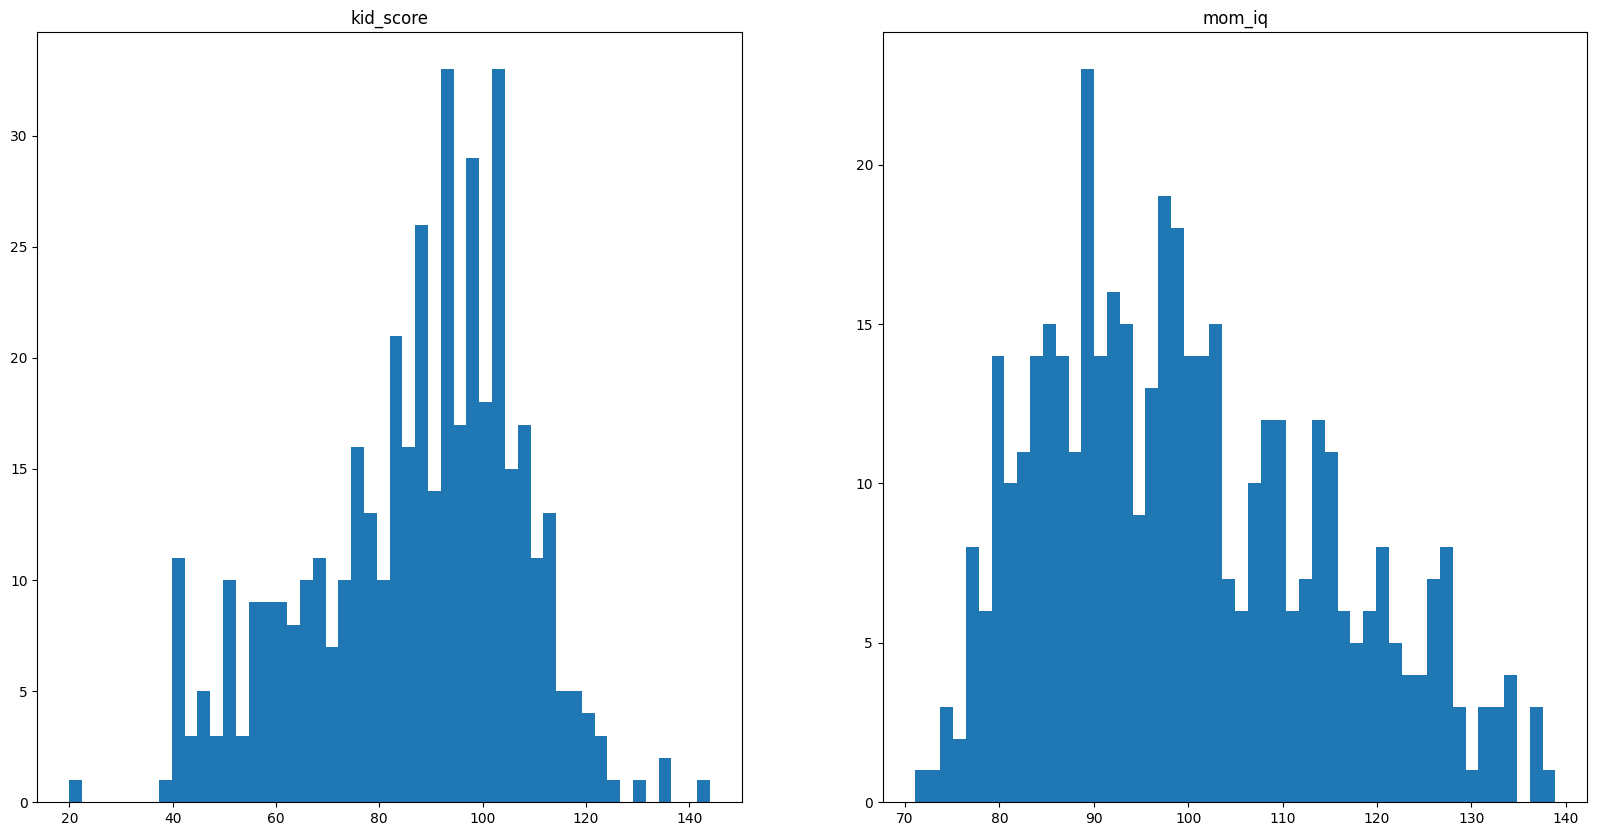

In [5]:
# Visualisation de la distribution des variables
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
axs = axs.ravel()

for i, column in enumerate(table.columns):
    axs[i].hist(table[column], bins=50)
    axs[i].set_title(column)

plt.show()

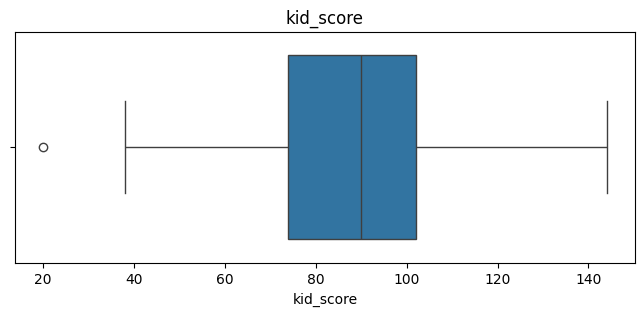

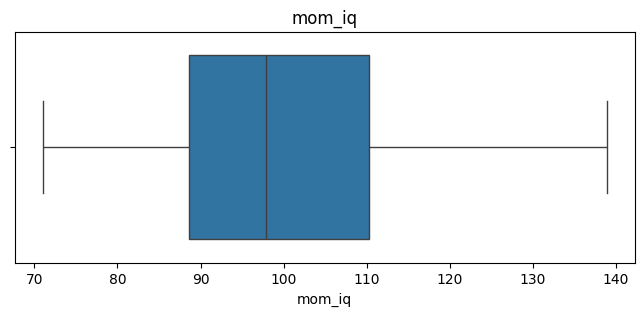

In [6]:
# Tracé des boxplots pour chaque variable
for column in table.columns:
    fig, ax = plt.subplots(figsize=(8, 3))
    sns.boxplot(x=table[column], ax=ax)
    plt.title(column)
    plt.show()

In [23]:
#régression linéaire
import statsmodels.api as sm
X=table["mom_iq"]
Y=table["kid_score"]
#fit du modèle
lr_model = sm.OLS(Y, sm.add_constant(X)).fit()
#afficher la sortie
results_table = lr_model.summary2().tables[1]
results_table
#Y_predi=Y-lr_model.predict(sm.add_constant(X))
#residus=Y-Y_predi
#residus

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
const,25.799778,5.917412,4.359977,1.627847e-05,14.169279,37.430277
mom_iq,0.609975,0.058521,10.423188,7.661950e-23,0.494953,0.724996


Maintenant nous allons créer des echantillons Bootstrap des résidus ensuite créer des échantillons Bootstrap pour la variable à expliquer en utilisant la formule suivante:



In [16]:
# échantillon Bootstrap des prédictions

R=100
bootstrap_samples = [residus.sample(n=len(residus), replace=True) for _ in range(R)]
bootstrap_samples
bootstrap_predictions=[]
#beta_0=[]
for bootstrap_residual in bootstrap_samples:
    bootstrap_predictions.append(np.array(Y_predi) + bootstrap_residual)
bootstrap_predictions[0]

274     41.037367
58      90.200722
284     69.498121
74      77.508201
75     112.651105
          ...    
127     98.680772
126     84.770502
315     64.627533
393     90.373294
328     73.417863
Length: 434, dtype: float64

In [22]:
#on va tirer l'estimation de beta_1 pour chaque échantillon Bootstrap
#Pour cela nous allons faire une regression de chaque échantillon bootsrap avec la covariable X=mom_iq
beta_1=[]
for bootstrap_res in bootstrap_predictions:
    lr_model = sm.OLS(np.array(bootstrap_res), sm.add_constant(X)).fit()
    beta_1.append(lr_model.params[1])
beta_1[3] #pour afficher une estimation de beta_1

0.029639683624954873

In [40]:
#la moyenne et l'écart-type
print(f" mean = {np.mean(beta_1)}")
print(f" std = {np.std(beta_1)}")
#np.std(beta_1)

 mean = -0.0014572670825218714
 std = 0.030280878636734884


(array([1., 1., 1., 0., 1., 3., 1., 1., 1., 1., 1., 1., 4., 1., 5., 4., 5.,
        4., 2., 5., 1., 3., 6., 5., 3., 3., 5., 3., 1., 2., 1., 5., 1., 2.,
        1., 6., 1., 0., 0., 1., 2., 0., 0., 1., 0., 1., 1., 0., 1., 1.]),
 array([-0.06582237, -0.06299648, -0.06017058, -0.05734469, -0.0545188 ,
        -0.05169291, -0.04886702, -0.04604112, -0.04321523, -0.04038934,
        -0.03756345, -0.03473756, -0.03191166, -0.02908577, -0.02625988,
        -0.02343399, -0.0206081 , -0.01778221, -0.01495631, -0.01213042,
        -0.00930453, -0.00647864, -0.00365275, -0.00082685,  0.00199904,
         0.00482493,  0.00765082,  0.01047671,  0.01330261,  0.0161285 ,
         0.01895439,  0.02178028,  0.02460617,  0.02743207,  0.03025796,
         0.03308385,  0.03590974,  0.03873563,  0.04156152,  0.04438742,
         0.04721331,  0.0500392 ,  0.05286509,  0.05569098,  0.05851688,
         0.06134277,  0.06416866,  0.06699455,  0.06982044,  0.07264634,
         0.07547223]),
 <BarContainer object

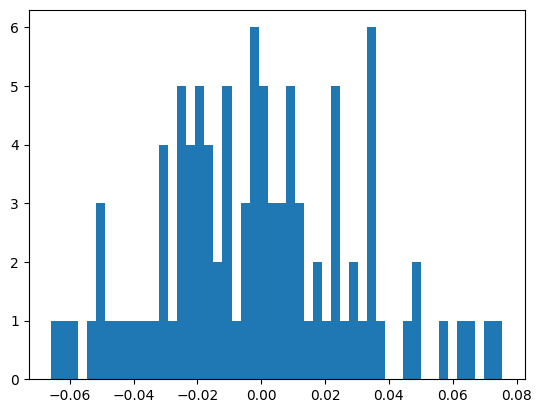

In [28]:
#l'histogramme des estimations de beta_1
plt.hist(beta_1, bins=50)

## Partie 3:

Dans cette partie, nous allons étudiar la stabilité des estimateurs d'une regression linéaire par la méthode Bootstrap.

Pour ce faire, nous allons utiliser un dataframe nommé Rwanda. Les données de cette base de données sont issues de l’enquête Démographique EDS 2019 au Rwanda  pour plus d'information sur l'enquête suivez le lien [https://www.statistics.gov.rw/publication/demographic-and-health-survey-20192020-key-indicators] .

Cette enquête a été menée auprès des ménages dans 30 districtes.
- Les individus correspondent aux disctrites de Rwanda.
- Les variables correspondent aux équipements des ménages (elecrticity, bed, radio ..etc).

Notre tableau contient 30 individus et 7 variables.

In [ ]:
# Importation de la table
rwanda = pd.read_csv("rwanda.csv", sep=';', decimal=',')
rwanda.head()

FileNotFoundError: [Errno 2] No such file or directory: 'rwanda.csv'

Nous allons chercher à expliquer le pourcentage de possession de radios dans un district par la présence d'électricité. Pour cela, nous allons réaliser une régression linéaire avec la variable à expliquer (Y) étant le pourcentage de possession de radios et la variable explicative (X) étant la présence d'électricité.

In [ ]:
# exploration des données
variable = ["radio", "electricity"]
radio = rwanda[["radio"]]
elec= rwanda[["electricity"]]
table=rwanda[variable]


In [ ]:
table["radio"].value_counts()
table["electricity"].value_counts()
table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   radio        30 non-null     float64
 1   electricity  30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model=LinearRegression()
elec

,electricity
0,0.918129
1,0.835165
2,0.947674
3,0.331197
4,0.375904
5,0.437346
6,0.395631
7,0.244604
8,0.389140
9,0.420673


In [ ]:
elec = np.array(elec)
elec=elec.reshape((-1, 1))
elec
radio= np.array(radio)
radio


array([[0.56530214],
       [0.56959707],
       [0.67054264],
       [0.36752137],
       [0.32771084],
       [0.27027027],
       [0.35436893],
       [0.30215827],
       [0.37556561],
       [0.51682692],
       [0.43509615],
       [0.37226277],
       [0.24759615],
       [0.38554217],
       [0.33173077],
       [0.30288462],
       [0.37956204],
       [0.38256659],
       [0.52300242],
       [0.43614458],
       [0.4138756 ],
       [0.39320388],
       [0.35024155],
       [0.45762712],
       [0.35520362],
       [0.39613527],
       [0.38277512],
       [0.36752137],
       [0.41105769],
       [0.37954545]])

In [ ]:
# entrainement du modèle
model.fit(table[['elec']],radio)

LinearRegression()

In [ ]:
# les coefficients intercept_=b_0 et coef_=b_1
print(f" intercept b_0 = {model.intercept_}")

print(f" coefficient b_1 = {model.coef_}")


 intercept b_0 = [0.24590315]
 coefficient b_1 = [[0.35054667]]


In [ ]:
# echantillon  bootstrap des estimateurs
n= 100
ech_b0=[]
for i in range(n):
  ech_bootstrap= table.sample(n=len(table), replace=True)

  elec=ech_bootstrap[["electricity"]]
  radio=ech_bootstrap[["radio"]]
  model.fit(elec,radio)
  ech_b0.append(model.intercept_[0])



(array([ 3., 19., 24., 24., 14., 13.,  2.,  0.,  0.,  1.]),
 array([0.16526892, 0.19250597, 0.21974303, 0.24698009, 0.27421715,
        0.3014542 , 0.32869126, 0.35592832, 0.38316538, 0.41040243,
        0.43763949]),
 <BarContainer object of 10 artists>)

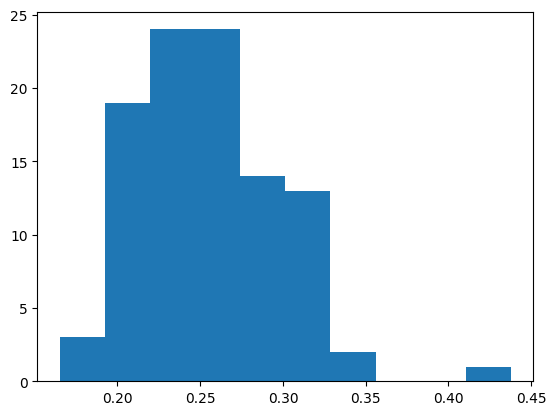

In [ ]:
plt.hist(ech_b0)

In [ ]:
np.mean(ech_b0)
np.std(ech_b0)

0.04299554577264658

# Partie 4 :

l'application du principe de boostrap parametrique sur la regression en utilsante la loi normal

In [ ]:
# Importation de la table
kidiq = pd.read_csv("kidiq.csv")
kidiq.head()


,kid_score,mom_hs,mom_iq,mom_work,mom_age
0,65,1,121.117529,4,27
1,98,1,89.361882,4,25
2,85,1,115.443165,4,27
3,83,1,99.449639,3,25
4,115,1,92.745710,4,27


In [ ]:
A = kidiq['mom_age']
B = kidiq['kid_score']